# Detekcija godina, pola i emocija

Student: Nikola Aleksić IT72/2018

Predmet: Principi prezentacije i prepoznavanja oblika

Prepoznavanje pola, godina i emocija predstavlja klasifikacioni problem gde slika treba da se svrsta u jednu od kategorija za svaku od pomenutih odlika lica. Automatsko prepoznavanje emocija lica je izuzetno primenljivo u realnim sistemima, i kako autori [1] navode, značajno doprinose poboljšanju sistemima preporuke.

U rešavanju ovog problema najbolje su se pokazale duboke konvolucione neuronske mreže zbog njihove mogućnost da izdvoje važne odlike na izuzetno efikasan način [1][2].

Kao zadatak dobio sam dataset sa dva foldera u kom se nalazi po 5 foldera sa slikama za treniranje. Analizirajući lice čoveka možemo dobiti mnogo informacija poput starosti, pola, emocija itd. Računarski vid se koristi za obuku mašina za razumevanje i razumevanje stvarnog sveta. Koristeći nekoliko digitalnih slika sa veb kamere računari mogu tačno da otkriju i klasifikuju objekte, a zatim da odgovore na ono što „vide“ u stvarnom svetu. Postoje različite upotrebe za identifikovanje starosti i pola na licu, poput forenzičkog testiranja. Emocije sa lica mogu se koristiti za predviđanje interakcije čoveka i računara.

[1] A. Singh, N. Rai2 & co. “Age, Gender Prediction and Emotion recognition using Convolutional Neural Network”, pages 1,2 April 2021

[2] D. J. Sharma, A. Sufian & co. “REGA: Real-Time Emotion, Gender, Age Detection Using CNN—A Review”, pages 1,2 January 2020

In [1]:
# učitavanje seta podataka
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vIyvXtTerVUWVuRRPGcFgXTkgUgM-d9U' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vIyvXtTerVUWVuRRPGcFgXTkgUgM-d9U" -O images.zip && rm -rf /tmp/cookies.txt

--2022-09-18 12:17:08--  https://docs.google.com/uc?export=download&confirm=&id=1vIyvXtTerVUWVuRRPGcFgXTkgUgM-d9U
Resolving docs.google.com (docs.google.com)... 173.194.214.138, 173.194.214.101, 173.194.214.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.214.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o52nmtb2glpll7m25i61o69mer6mi79i/1663503375000/06049624160957438625/*/1vIyvXtTerVUWVuRRPGcFgXTkgUgM-d9U?e=download&uuid=e0568aa4-c31e-4a51-91b3-9aacd4ffc444 [following]
--2022-09-18 12:17:10--  https://doc-00-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/o52nmtb2glpll7m25i61o69mer6mi79i/1663503375000/06049624160957438625/*/1vIyvXtTerVUWVuRRPGcFgXTkgUgM-d9U?e=download&uuid=e0568aa4-c31e-4a51-91b3-9aacd4ffc444
Resolving doc-00-64-docs.googleusercontent.com (doc-00-64-docs.googleusercontent.com)... 173.194.215.1

In [2]:
# unzipovanje podataka
!unzip images.zip

Archive:  images.zip
  inflating: data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: data/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: data/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: data/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg  
  inflating: data/train/ben_afflek/httptrwebimgacstanetcxbdddmediasnmediajpg.jpg  
  inflating: data/train/ben_afflek/httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg  
  inflating

# Osnovne vizualizacije

In [3]:
# dodavanje fajla sa metapodacima za trening set
!gdown --id 1EsLW-ribnmCpuIA1H904K895maRQuGfy

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1EsLW-ribnmCpuIA1H904K895maRQuGfy
To: /content/images_labels.xlsx
100% 12.6k/12.6k [00:00<00:00, 12.0MB/s]


In [4]:
# dodavanje fajla sa metapodacima za validacioni set
!gdown --id 1KXQUYuosJe5xZx07zW3NoPDZD26UXhsU

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1KXQUYuosJe5xZx07zW3NoPDZD26UXhsU
To: /content/validation_images_labels.xlsx
100% 9.75k/9.75k [00:00<00:00, 9.81MB/s]


In [5]:
# učitavanje metapodataka u dataframe

import pandas as pd
import seaborn as sb
file = '/content/images_labels.xlsx'
df = pd.read_excel(file)
print(df)

                                             image_id gender   age  emotion
0   ./train/madonna/httpiamediaimdbcomimagesMMVBMT...      F  42.0      1.0
1   ./train/madonna/httpimagegaladevcmseamadonnapr...      F  39.0      0.0
2   ./train/madonna/httpimgclosermagfrvarclosermag...      F  35.0      1.0
3   ./train/madonna/httpmediavoguecomrwblondesdark...      F  38.0      0.0
4   ./train/madonna/httpresizeparismatchladmediafr...      F  46.0      0.0
..                                                ...    ...   ...      ...
88  ./train/jerry_seinfeld/httpwwwnndbcompeoplejer...      M  35.0      0.0
89  ./train/jerry_seinfeld/httpwwwpictureszimbioco...      M  40.0      1.0
90  ./train/jerry_seinfeld/httpwwwpsychiatrictimes...      M  42.0      1.0
91  ./train/jerry_seinfeld/httpwwwslatecomcontentd...      M  44.0      1.0
92  ./train/jerry_seinfeld/httpwwwwatchidcomsitesd...      M  27.0      0.0

[93 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


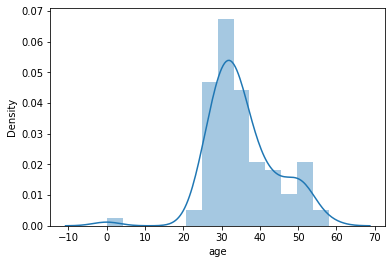

In [6]:
# vizualizacija godina

sb.distplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


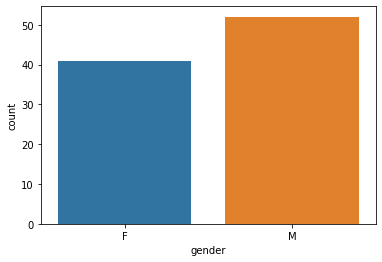

In [7]:
# vizualizacija odnosa polova
sb.countplot(df['gender'])

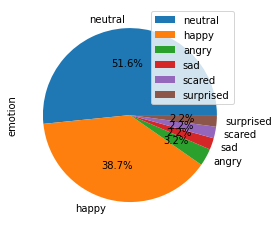

In [8]:
# vizualizacija emocija

import matplotlib.pyplot as plt

df['emotion'] = df['emotion'].replace('0','neutral')
df['emotion'] = df['emotion'].replace('1','happy')
df['emotion'] = df['emotion'].replace('2','angry')
df['emotion'] = df['emotion'].replace('3','sad')
df['emotion'] = df['emotion'].replace('4','scared')
df['emotion'] = df['emotion'].replace('5','surprised')

df['emotion'].value_counts().plot.pie(autopct="%1.1f%%", labels = ['neutral' , 'happy', 'angry', 'sad', 'scared', 'surprised'])
plt.legend()

# Detekcija pola i godina

Computer vision je oblast proučavanja koja omogućava računarima da vide i identifikuju digitalne slike i video zapise kao što bi to činio čovek. Izazovi sa kojima se suočava uglavnom proizilaze iz ograničenog razumevanja biološke vizije. Kompjuterska vizija uključuje sticanje, obradu, analizu i razumevanje digitalnih slika za izdvajanje visokodimenzionalnih podataka iz stvarnog sveta kako bi se generisale simboličke ili numeričke informacije koje se zatim mogu koristiti za donošenje odluka. Proces često uključuje prakse kao što su prepoznavanje objekata, video praćenje, procena pokreta i restauracija slike.

OpenCV je skraćenica od Open Source Computer Vision. Intuitivno po imenu, to je biblioteka računarskog vida i mašinskog učenja otvorenog koda. Ova biblioteka je sposobna da obrađuje slike i video zapise u realnom vremenu, a istovremeno se može pohvaliti i analitičkim mogućnostima. Podržava okvire dubokog učenja TensorFlow, Caffe i PiTorch.

Konvoluciona neuronska mreža je duboka neuronska mreža (DNN) koja se široko koristi u svrhe prepoznavanja i obrade slika i NLP-a. Takođe poznat kao ConvNet, CNN ima ulazne i izlazne slojeve i više skrivenih slojeva, od kojih su mnogi konvolucioni. Na neki način, CNN su regularizovani višeslojni perceptroni.

In [9]:
!git clone https://github.com/misbah4064/age_and_gender_detection.git
%cd age_and_gender_detection

Cloning into 'age_and_gender_detection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (11/11), done.
/content/age_and_gender_detection


In [10]:
# preuzimanje unaprijed istreniranih podataka
!gdown https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
# unzipovanje modela
!unzip modelNweight.zip

Downloading...
From: https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
To: /content/age_and_gender_detection/modelNweight.zip
100% 86.2M/86.2M [00:00<00:00, 211MB/s]
Archive:  modelNweight.zip
   creating: modelNweight/
  inflating: modelNweight/age_deploy.prototxt  
  inflating: modelNweight/age_net.caffemodel  
  inflating: modelNweight/gender_deploy.prototxt  
  inflating: modelNweight/gender_net.caffemodel  
  inflating: modelNweight/opencv_face_detector.pbtxt  
  inflating: modelNweight/opencv_face_detector_uint8.pb  


In [11]:
# Dodavanje potrebnih modula
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow

# traženje koordinata za okvir

def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

# učitavanje fajlova za model i težinu

faceProto = "modelNweight/opencv_face_detector.pbtxt"
faceModel = "modelNweight/opencv_face_detector_uint8.pb"

ageProto = "modelNweight/age_deploy.prototxt"
ageModel = "modelNweight/age_net.caffemodel"

genderProto = "modelNweight/gender_deploy.prototxt"
genderModel = "modelNweight/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
# lista godina
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
# lista polova
genderList = ['Male', 'Female']

# Load network (težina, konfiguracija)
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # iščitavanje frejma
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:

        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

        # Predikcija godina i pola detektovanih lica
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        # Iscrtavanje rezultata
        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace

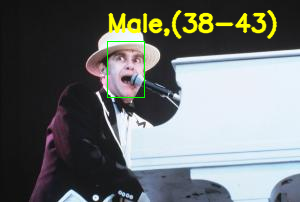

In [12]:
#učitavanje slike i prikaz rezultata
input = cv.imread("/content/train/elton_john/httpftqncomymusicLxZeltonjohnjpg.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

# Detekcija emocija

Izdvajaju se ključne tačke lica i na osnovu njih prepoznaje se koja je emocija u pitanju. Dodatni set podataka je korišćen za obučavanje, pošto set podataka nije inicijalno bio predviđen za predviđanje emocija već lica.

In [13]:
!pip install tensorflow==2.7.0
!pip install Keras==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 17 kB/s 
     |████████████████████████████████| 463 kB 3.9 MB/s 
     |████████████████████████████████| 1.3 MB 8.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab2022071

In [14]:
import numpy as np
import pandas as pd
import os

In [15]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [223]:
# pribavljanje podataka za trening
filname = '/content/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('/content/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [255]:
# preuzimanje podataka iz fajla i smještanje u liste

def getData(filname):

    Y = []
    X = []

    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    length = len(X)
    i = 0
    X = np.array(X)
    while i < length:
        X[i] = [c/255.0 for c in X[i]]
        i += 1
    
    print(X.shape)
    Y = np.array(Y)
    return X, Y

In [257]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

(35887, 2304)
7


In [258]:
# slike formatiramo kao 48x48
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [259]:
from sklearn.model_selection import train_test_split

# podjela trening : validacija : test  80:10:10

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [260]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization

Kreiramo sekvencijalni model

Prvi sloj vezan je za ulazne slikame, koje se vide kao dvodimenzionalne matrice. Broj čvorova je 64, a matrica je 5x5. Koristimo funkciju aktivacije ReLU ili Rectified Linear Activation. Dokazano je da ova funkcija aktiviranja dobro funkcioniše u neuronskim mrežama. MaxPooling2D slojevi se koriste za smanjenje dimenzija mapa karakteristika. Tako se smanjuje broj parametara za učenje i količina računanja izvedenih u mreži.

Između slojeva Conv2D i Dense nalazi se sloj Flatten koji nam služi kao veza među tim slojevima. Dense koristimo za naš izlazni sloj. Dropout sloj služi za sprečavanje overfitting-a.

U izlaznom sloju imaćemo 7 čvorova, po jedan za svaki mogući ishod. Aktivacija je softmax. Softmax čini zbir izlaza do 1 tako da se izlaz može tumačiti kao verovatnoća. Model će zatim napraviti svoje predviđanje na osnovu opcije koja ima najveću verovatnoću.

Nakon toga vrši se kompajliranje modela.

Koristićemo Adam kao naš optimizator za kontrolu brzine učenja. Za funkciju gubitka koristićemo categorical_crossentropy. Niži rezultat ukazuje na to da model radi bolje. Kao metriku koristićemo accuracy da bismo videli rezultat tačnosti na skupu provere prilikom obuke modela.

In [261]:
# kreiranje CNC modela i dodavanje slojeva

def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    
    return model
model=my_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 48, 48, 64)        1664      
                                                                 
 conv2d_38 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 conv2d_40 (Conv2D)          (None, 24, 24, 128)      

In [262]:
import tensorflow.keras.backend as K

# čuva model na ovoj lokaciji za svaki epoch
path_model='model_filter.h5'

# uništava trenutni graf i kreira novi
K.clear_session()

# kreiranje modela 
model=my_model() 

# podešavanje stope učenja
K.set_value(model.optimizer.lr,1e-3) 

# fitovanje modela
h=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=1, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

505/505 [==============================] - 3269s 6s/step - loss: 1.8620 - accuracy: 0.2454 - val_loss: 1.7922 - val_accuracy: 0.2636


In [263]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [264]:
# analiza emocija

def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
plt.show()

In [265]:
y_pred=model.predict(X_test)
#print(y_pred)
y_test.shape

(3589, 7)

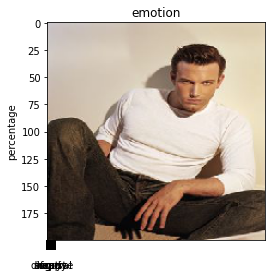

Expression Prediction: fear


In [267]:
from skimage import io

# učitavanje slike
img = image.load_img('/content/data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg', grayscale=True, target_size=(48, 48))
show_img=image.load_img('/content/data/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg', grayscale=False, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

# normalizacija 0.0-1.0
x /= 255

# predikcija
custom = model.predict(x)
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

# prikaz slike
plt.gray()
plt.imshow(show_img)
plt.show()

m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

#ispisivanje rezultata
print('Expression Prediction:',objects[ind])

# DeepFace analiza

DeepFace je sistem dubokog učenja za prepoznavanje lica koji je kreirala istraživačka grupa na Fejsbuku. On identifikuje ljudska lica na digitalnim slikama. Program koristi devetoslojnu neuronsku mrežu sa preko 120 miliona težinskih veza i obučen je na četiri miliona slika koje su postavili korisnici Fejsbuka. DeepFace dostiže tačnost od 97,35% ± 0,25% na skupu podataka označenih LFV, gde ljudi imaju 97,53%. To znači da je DeepFace ponekad uspešniji od ljudskih bića.

In [134]:
#dodavanje potrebnih biblioteka
!pip install deepface
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 1.8 MB/s 
     |████████████████████████████████| 2.3 MB 6.6 MB/s 
     |████████████████████████████████| 87 kB 7.3 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=02540107882ca22f33657bc2f2c34441f483947c59efce284b7675e7e44ef4e8
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
Directory  /root /.deepface created
Directory  /root /.deepface/weights created


<function matplotlib.pyplot.show(*args, **kw)>

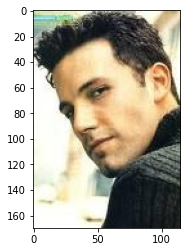

In [135]:
#učitavanje i prikaz slike
img1=cv2.imread('/content/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(img1[:,:,::-1])
plt.show

In [136]:
#određivanje pola, godina i emocija i ispisivanje rezultata
result = DeepFace.analyze(img1, actions=['gender'], enforce_detection=False)
print("Gender: ", result['gender'])
result = DeepFace.analyze(img1, actions=['age'], enforce_detection=False)
print("Age: ", result['age'])
result = DeepFace.analyze(img1, actions=['emotion'], enforce_detection=False)
print("Emotion: ", result['emotion'])

gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5
100%|██████████| 537M/537M [00:07<00:00, 67.8MB/s]


Gender:  Man
age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5
100%|██████████| 539M/539M [00:05<00:00, 90.1MB/s]


Age:  37
facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 63.8MB/s]


Emotion:  {'angry': 0.05412267055362463, 'disgust': 3.3124235992998408e-09, 'fear': 19.969533383846283, 'happy': 1.4777741252913756e-07, 'sad': 79.88331317901611, 'surprise': 1.3128226928811261e-16, 'neutral': 0.093030312564224}


<function matplotlib.pyplot.show(*args, **kw)>

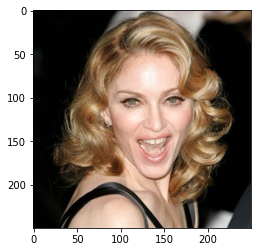

In [137]:
#učitavanje i prikaz slike
img2=cv2.imread('/content/train/madonna/httpimgclosermagfrvarclosermagstorageimagesactupeoplebiodestarsmadonnamadonnafreFRmadonnaexactxljpg.jpg')
plt.imshow(img2[:,:,::-1])
plt.show

In [138]:
#određivanje pola, godina i emocija i ispisivanje rezultata
result = DeepFace.analyze(img2, actions=['gender'], enforce_detection=False)
print("Gender: ", result['gender'])
result = DeepFace.analyze(img2, actions=['age'], enforce_detection=False)
print("Age: ", result['age'])
result = DeepFace.analyze(img2, actions=['emotion'], enforce_detection=False)
print("Emotion: ", result['emotion'])

Gender:  Woman
Age:  35
Emotion:  {'angry': 8.247731878348855e-06, 'disgust': 1.2800798511167374e-09, 'fear': 3.352138766528711e-07, 'happy': 96.22436739351555, 'sad': 0.0001393236485734766, 'surprise': 0.0018990554276174375, 'neutral': 3.7735892846339514}


# Zaključak

Zbog toga što set podataka nije bio unapred predviđen za analizu pola, godina i emocija bio je izazov istraživati algoritme koji bi odgovarali ovakvom zadatku i prilagoditi ih zahtevima i setu podataka. Ipak na kraju je uspešno realizovan, urađeni su svi koraci od učitavanja podataka preko obrade i treniranja modela do samih rezultata za koje se može reći da u velikoj meri odgovaraju stvarnom stanju.